In [1]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
from numba import jit
from numba.typed import List
a = sys.path.append('../modules/')
b = sys.path.append('../codes/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators_array, aux_operators_array, graphs_and_dist

In [2]:
os.chdir('/home/romulo/my_project_dir/Inversao_magnetica/codes/tests')
data_cubo = pd.read_table('data_mag_arraial_1.csv', sep=',')

In [3]:
east_min = np.min(data_cubo['East(m)'])
east_max = np.max(data_cubo['East(m)'])
north_min = np.min(data_cubo['North(m)'])
north_max = np.max(data_cubo['North(m)'])

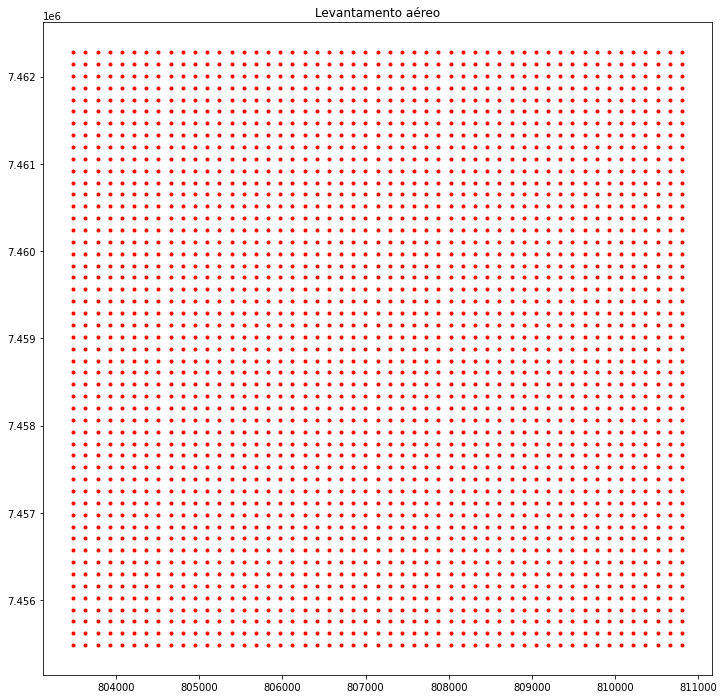

In [4]:
acquisition = {'nx': 51,
               'ny': 51,
               'xmax': east_max,
               'xmin': east_min ,
               'ymax': north_max,
               'ymin': north_min,
               'z': -50.0,
               'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

In [5]:
data_cubo

,North(m),East(m),Anomalia Magnética(nT)
0,7.455632e+06,803484.484404,-102.266401
1,7.455765e+06,803487.168534,-53.562462
2,7.455898e+06,803489.852531,-78.951357
3,7.456031e+06,803492.536396,-107.502323
4,7.456164e+06,803495.220128,-100.175385
...,...,...,...
2596,7.461602e+06,810792.372770,-132.075354
2597,7.461735e+06,810795.114360,-124.969649
2598,7.461868e+06,810797.855814,-129.519775
2599,7.462001e+06,810800.597132,-125.454654


In [6]:
Y = np.array(data_cubo['East(m)'])
Y = np.reshape(Y, (51,51))
X = np.array(data_cubo['North(m)'])
X = np.reshape(X, (51,51))
Z = np.array(data_cubo['Anomalia Magnética(nT)'])
Z = np.reshape(Z, (51,51))

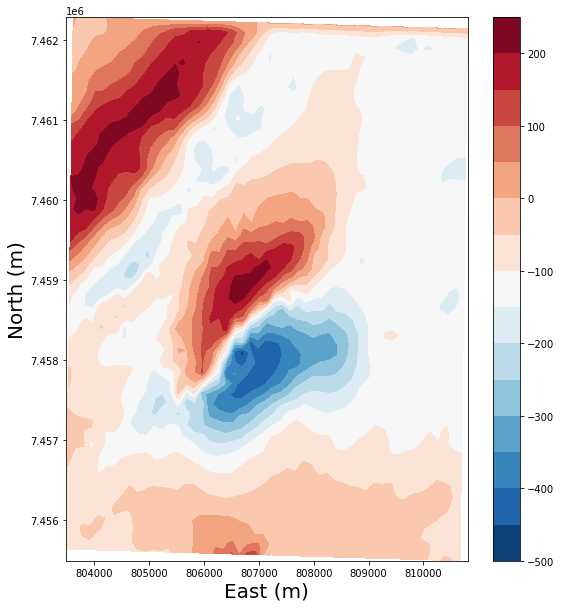

In [7]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y, X, Z, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [8]:
mean_anomaly = np.mean(data_cubo['Anomalia Magnética(nT)'])
print(mean_anomaly)

-70.04476773379982


In [9]:
# Ajuste 1
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 807000.0) & (data_cubo['North(m)'] >= 7460500.0) & (data_cubo['North(m)'] <= 7462335.0), 'Anomalia Magnética(nT)'] = -125.0

In [10]:
# Ajuste 2
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 805200.0) & (data_cubo['North(m)'] >= 7458500.0) & (data_cubo['North(m)'] <= 7460500.0), 'Anomalia Magnética(nT)'] = -125.0

In [11]:
# Ajuste 3
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 804450.0) & (data_cubo['North(m)'] >= 7455552.0) & (data_cubo['North(m)'] <= 7459500.0), 'Anomalia Magnética(nT)'] = -125.0


In [12]:
# Ajuste 4
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 810813.0) & (data_cubo['North(m)'] >= 7454552.0) & (data_cubo['North(m)'] <= 7456900.0), 'Anomalia Magnética(nT)'] = -125.0

In [13]:
# Ajuste 5
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 810813.0) & (data_cubo['North(m)'] >= 7462000.0) & (data_cubo['North(m)'] <= 7463552.0), 'Anomalia Magnética(nT)'] = -125.0

In [14]:
data_cubo

,North(m),East(m),Anomalia Magnética(nT)
0,7.455632e+06,803484.484404,-102.266401
1,7.455765e+06,803487.168534,-125.000000
2,7.455898e+06,803489.852531,-125.000000
3,7.456031e+06,803492.536396,-125.000000
4,7.456164e+06,803495.220128,-125.000000
...,...,...,...
2596,7.461602e+06,810792.372770,-132.075354
2597,7.461735e+06,810795.114360,-124.969649
2598,7.461868e+06,810797.855814,-129.519775
2599,7.462001e+06,810800.597132,-125.000000


In [15]:
Y_1 = np.array(data_cubo['East(m)'])
Y_1 = np.reshape(Y_1, (51,51))
X_1 = np.array(data_cubo['North(m)'])
X_1 = np.reshape(X_1, (51,51))
Z_1 = np.array(data_cubo['Anomalia Magnética(nT)'])
Z_1 = np.reshape(Z_1, (51,51))

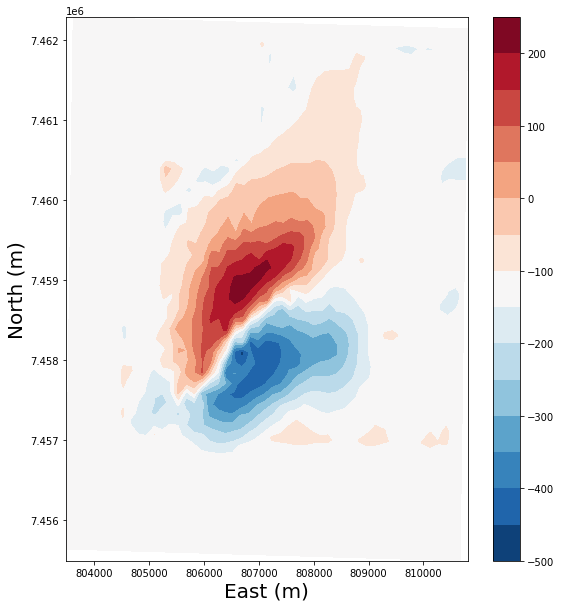

In [16]:
plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y_1, X_1, Z_1, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()

In [17]:
'''#data_cubo.loc(data_cubo['East(m)'] > 805000.0)
data_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 81913.34) & (data_cubo['North(m)'] >= 7455552.0) & (data_cubo['North(m)'] <= 7456500.0), 'Anomalia Magnética(nT)'] = -125.0
#data_cubo.loc[(data_cubo['East(m)'] <= 805500.0) & (data_cubo['North(m)'] >= 7459500.0), 'Anomalia Magnética(nT)'] = -110.0
#(data_cubo['East(m)'] >= 804532.0) & (data_cubo['East(m)'] <= 805500.0)
#(data_cubo['North(m)'] >= 7460598.0) & (data_cubo['North(m)'] <= 7459500.0)'''

"#data_cubo.loc(data_cubo['East(m)'] > 805000.0)\ndata_cubo.loc[(data_cubo['East(m)'] >= 803484.49) & (data_cubo['East(m)'] <= 81913.34) & (data_cubo['North(m)'] >= 7455552.0) & (data_cubo['North(m)'] <= 7456500.0), 'Anomalia Magnética(nT)'] = -125.0\n#data_cubo.loc[(data_cubo['East(m)'] <= 805500.0) & (data_cubo['North(m)'] >= 7459500.0), 'Anomalia Magnética(nT)'] = -110.0\n#(data_cubo['East(m)'] >= 804532.0) & (data_cubo['East(m)'] <= 805500.0)\n#(data_cubo['North(m)'] >= 7460598.0) & (data_cubo['North(m)'] <= 7459500.0)"

In [18]:
'''Y_2 = np.array(data_cubo['East(m)'])
Y_2 = np.reshape(Y_2, (51,51))
X_2 = np.array(data_cubo['North(m)'])
X_2 = np.reshape(X_2, (51,51))
Z_2 = np.array(data_cubo['Anomalia Magnética(nT)'])
Z_2 = np.reshape(Z_2, (51,51))'''

"Y_2 = np.array(data_cubo['East(m)'])\nY_2 = np.reshape(Y_2, (51,51))\nX_2 = np.array(data_cubo['North(m)'])\nX_2 = np.reshape(X_2, (51,51))\nZ_2 = np.array(data_cubo['Anomalia Magnética(nT)'])\nZ_2 = np.reshape(Z_2, (51,51))"

In [19]:
'''plt.figure(figsize=(9,10))
#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')
cubo = plt.contourf(Y_2, X_2, Z_2, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))
#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')
#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')
#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')
#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor magnetização do campo Regional', 'Vetor de magnetização do Campo estimado'], bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)
#plt.title('Total Field Anomaly of the final subject(nT)', fontsize = 20)
plt.xlabel('East (m)', fontsize = 20)
plt.ylabel('North (m)', fontsize = 20)
plt.colorbar()
#plt.savefig('prisma_anomalia.pdf', format='pdf')
plt.show()'''

"plt.figure(figsize=(9,10))\n#bolas = plt.contour(data_cubo['East(m)'], data_cubo['North(m)'], data_cubo['Anomalia Magnética(nT)'], levels = 10, cmap = 'gray', linewidths = 2, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))\n#plt.clabel(bolas , inline=2, fontsize=12, colors = 'k')\ncubo = plt.contourf(Y_2, X_2, Z_2, 15, cmap = plt.cm.RdBu_r)#, vmin = np.min(anomaly_cubo), vmax = np.max(anomaly_cubo))\n#arrow = plt.arrow(0.0, 0.0, 1000.0*ptx, 1000.0*pty, width=50.0,head_width=250.0, length_includes_head = False, color = 'k')\n#arrow1 = plt.arrow(0.0, 0.0, 1000.0*rptx, 1000.0*rpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'g')\n#arrow2 = plt.arrow(0.0, 0.0, 1000.0*bptx, 1000.0*bpty, width=50.0,head_width=250.0, length_includes_head = False, color = 'y')\n#first_legend = plt.legend(handles=[cubo], bbox_to_anchor=(1.25, 1), loc='upper left', borderaxespad=0.0, fontsize= 12.0)\n#plt.legend([arrow, arrow1, arrow2], ['Vetor magnetização da fonte', 'Vetor ma

In [22]:
Data_f = data_cubo
#Data_f.to_csv('data_ajustment_mag_arraial_v4.csv', index = False, header = True)

In [21]:
Data_f

,North(m),East(m),Anomalia Magnética(nT)
0,7.455632e+06,803484.484404,-102.266401
1,7.455765e+06,803487.168534,-125.000000
2,7.455898e+06,803489.852531,-125.000000
3,7.456031e+06,803492.536396,-125.000000
4,7.456164e+06,803495.220128,-125.000000
...,...,...,...
2596,7.461602e+06,810792.372770,-132.075354
2597,7.461735e+06,810795.114360,-124.969649
2598,7.461868e+06,810797.855814,-129.519775
2599,7.462001e+06,810800.597132,-125.000000
